In [1]:
import pandas as pd
pd.options.display.max_columns = None
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("marketing_campaign.csv",sep = "\t")

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [4]:
#değerlerin benzersiz olup olmadıklarına göz atalım
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [5]:
#ID ler tamamen benzersiz bu yüzden index yerine konulması mantıklı olacaktır
data.iloc[:,0]

0        5524
1        2174
2        4141
3        6182
4        5324
        ...  
2235    10870
2236     4001
2237     7270
2238     8235
2239     9405
Name: ID, Length: 2240, dtype: int64

In [6]:
data.index = data.iloc[:,0]
data = data.drop(["ID"], axis = 1)

In [7]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [10]:
data.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
data["Income"].mean() 

52247.25135379061

In [12]:
#incomede yer alan boş değerlerin yerine ortalaması ile doldurulacak
data["Income"].fillna(value = data["Income"].mean() , inplace=True)

In [13]:
data.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
data.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

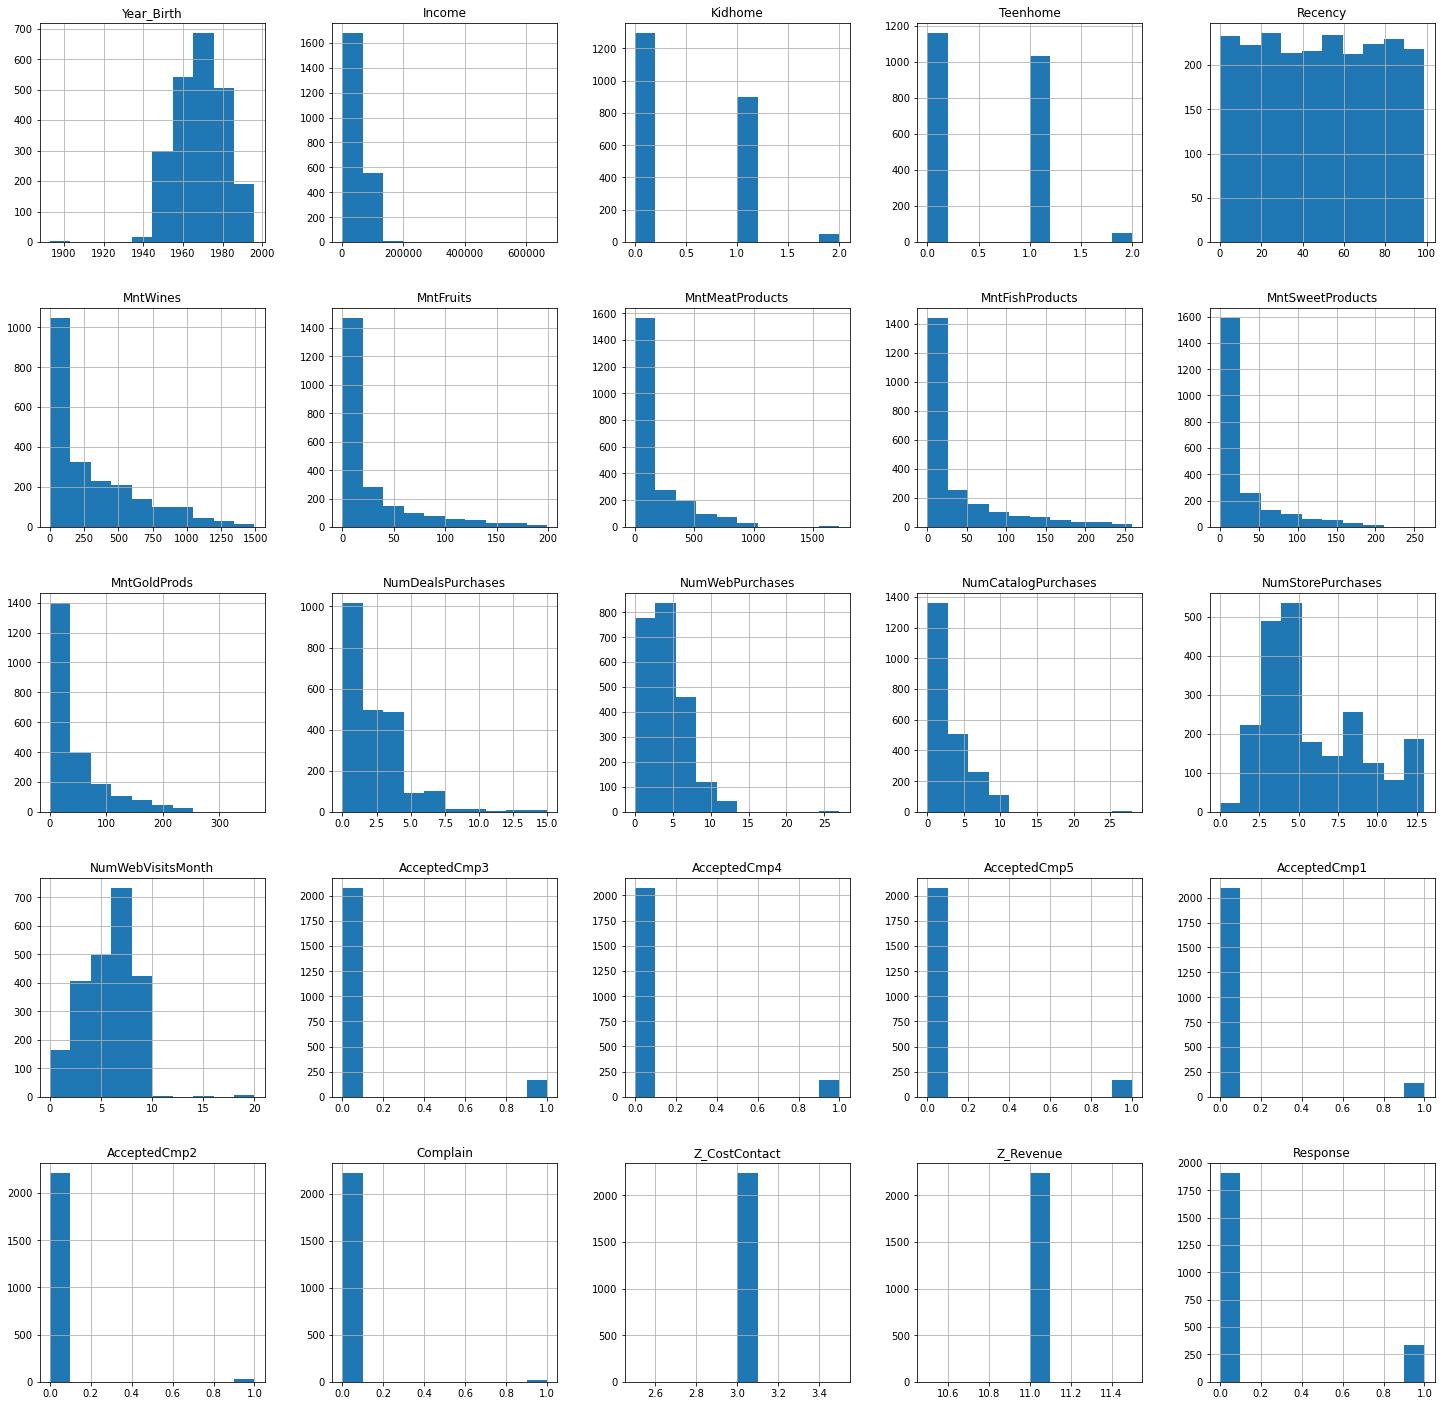

In [16]:
#değişkenlerin dağılımları ile ilgili bilgi edinelim
data.hist(figsize = (25,25));

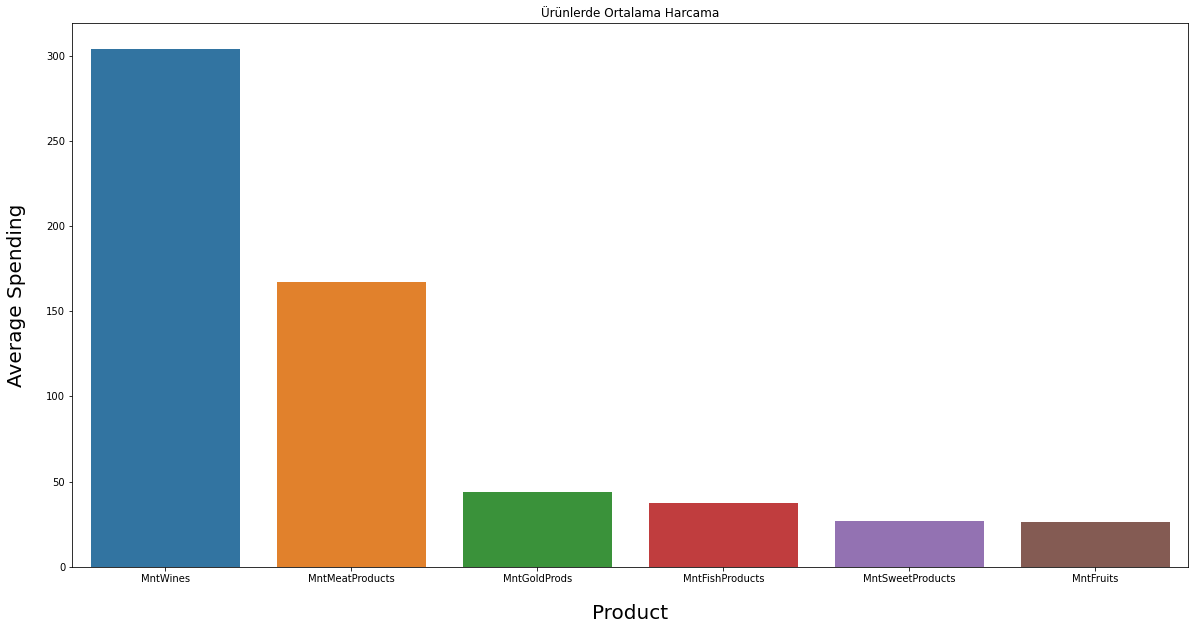

In [17]:
#Ürünlerde Ortalama Harcama
products = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])
plt.figure(figsize=(20,10))
plt.title('Ürünlerde Ortalama Harcama')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

In [18]:
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])
product_means_df

,Product,Average Spending
0,MntWines,303.935714
1,MntMeatProducts,166.950000
2,MntGoldProds,44.021875
3,MntFishProducts,37.525446
4,MntSweetProducts,27.062946
5,MntFruits,26.302232


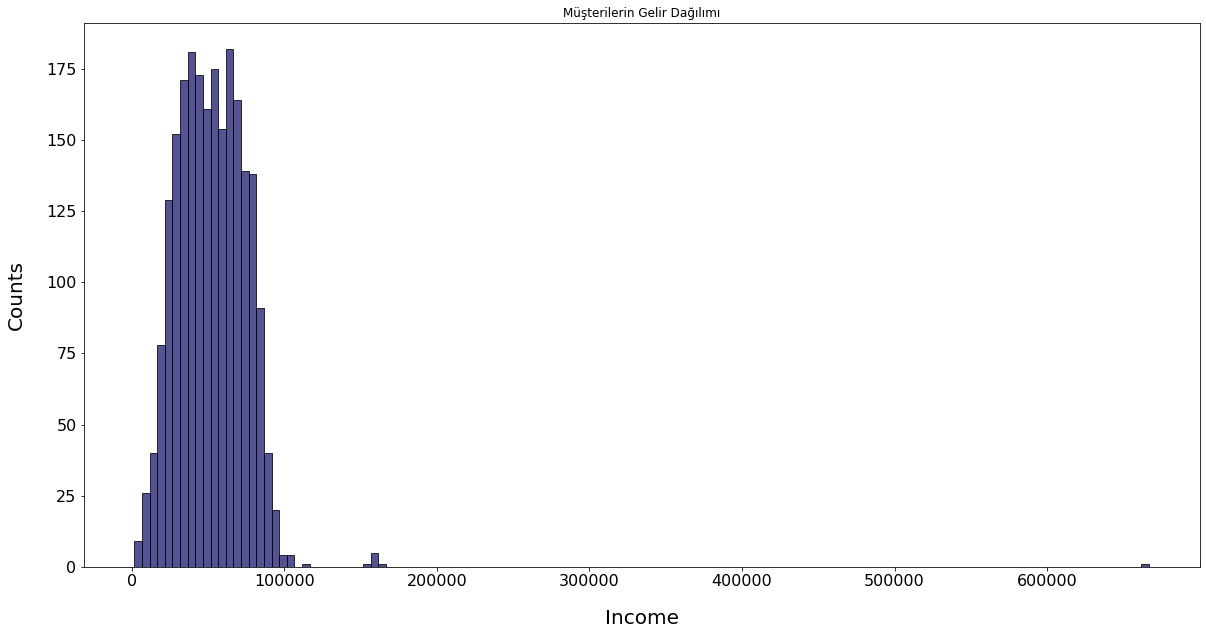

In [19]:
#Müşterilerin Gelir Dağılımı
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = data.Income, color = "midnightblue")
ax.set(title = "Müşterilerin Gelir Dağılımı");
#yazı boyutu
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

In [20]:
data['TotalSpendings'] =  data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds

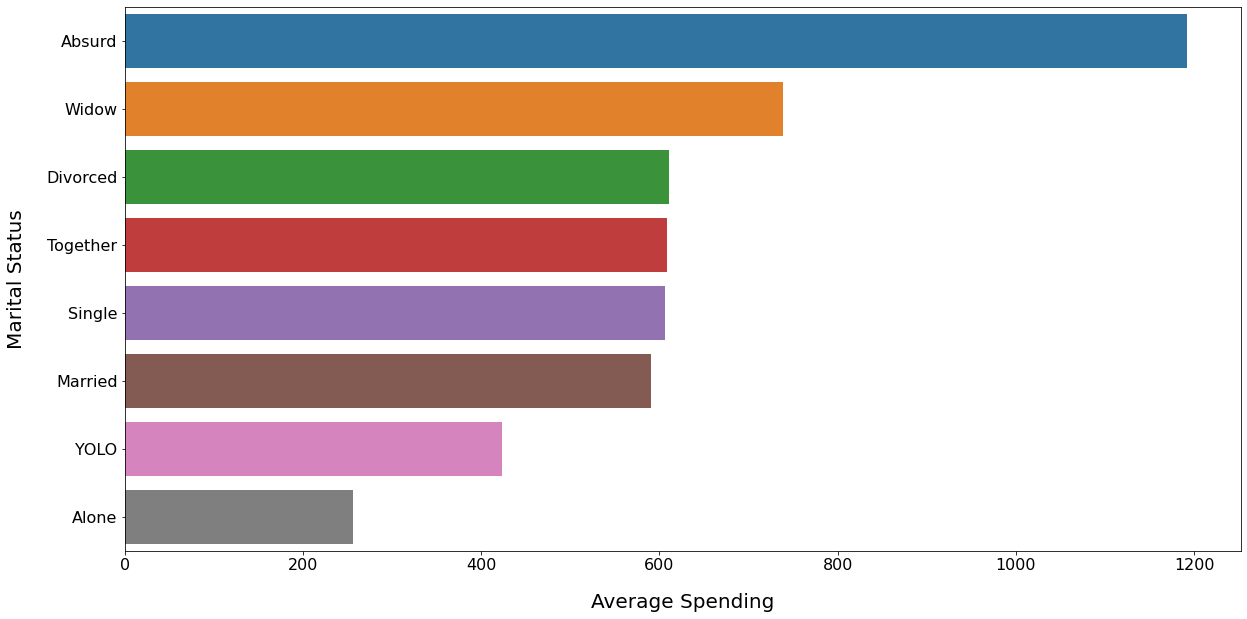

In [21]:
#Ortalama Harcama: Medeni Durum ile karşılaştırma
maritalspending = data.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

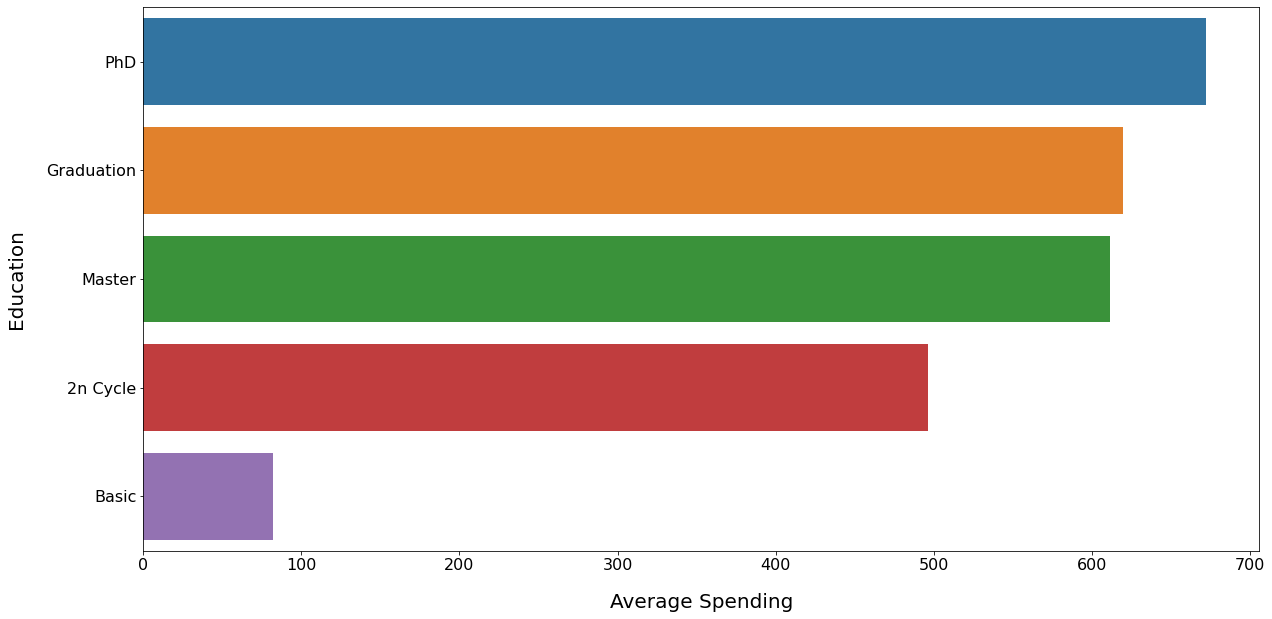

In [23]:
#eğitim durumuna göre harcama
educationspending = data.groupby('Education')['TotalSpendings'].mean().sort_values(ascending=False)
educationspending_df = pd.DataFrame(list(educationspending.items()), columns=['Education', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = educationspending_df, x="Average Spending", y="Education");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Education', fontsize=20, labelpad=20);

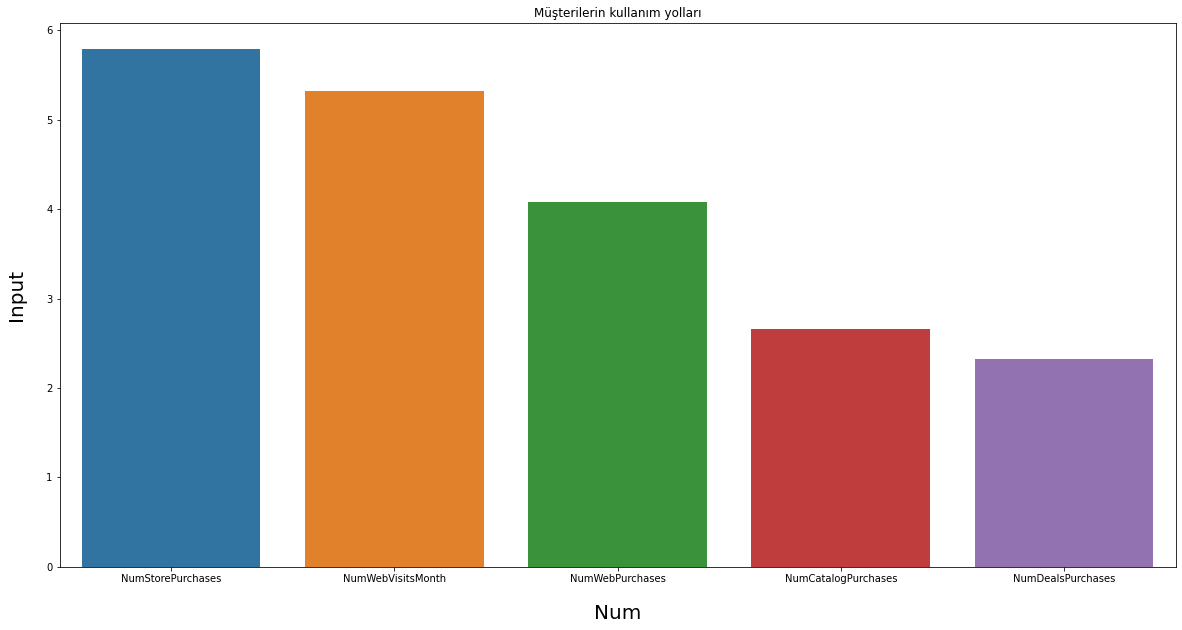

In [33]:
num = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
num_means = num.mean(axis=0).sort_values(ascending=False)
num_means_df = pd.DataFrame(list(num_means.items()), columns=['Num', 'Input'])
plt.figure(figsize=(20,10))
plt.title('Müşterilerin kullanım yolları')
sns.barplot(data=num_means_df, x='Num', y='Input');
plt.xlabel('Num', fontsize=20, labelpad=20)
plt.ylabel('Input', fontsize=20, labelpad=20);

In [35]:
num_means = num.mean(axis=0).sort_values(ascending=False)
num_means

NumStorePurchases      5.790179
NumWebVisitsMonth      5.316518
NumWebPurchases        4.084821
NumCatalogPurchases    2.662054
NumDealsPurchases      2.325000
dtype: float64

In [34]:
num_means_df = pd.DataFrame(list(num_means.items()), columns=['Num', 'Input'])
num_means_df

,Num,Input
0,NumStorePurchases,5.790179
1,NumWebVisitsMonth,5.316518
2,NumWebPurchases,4.084821
3,NumCatalogPurchases,2.662054
4,NumDealsPurchases,2.325000


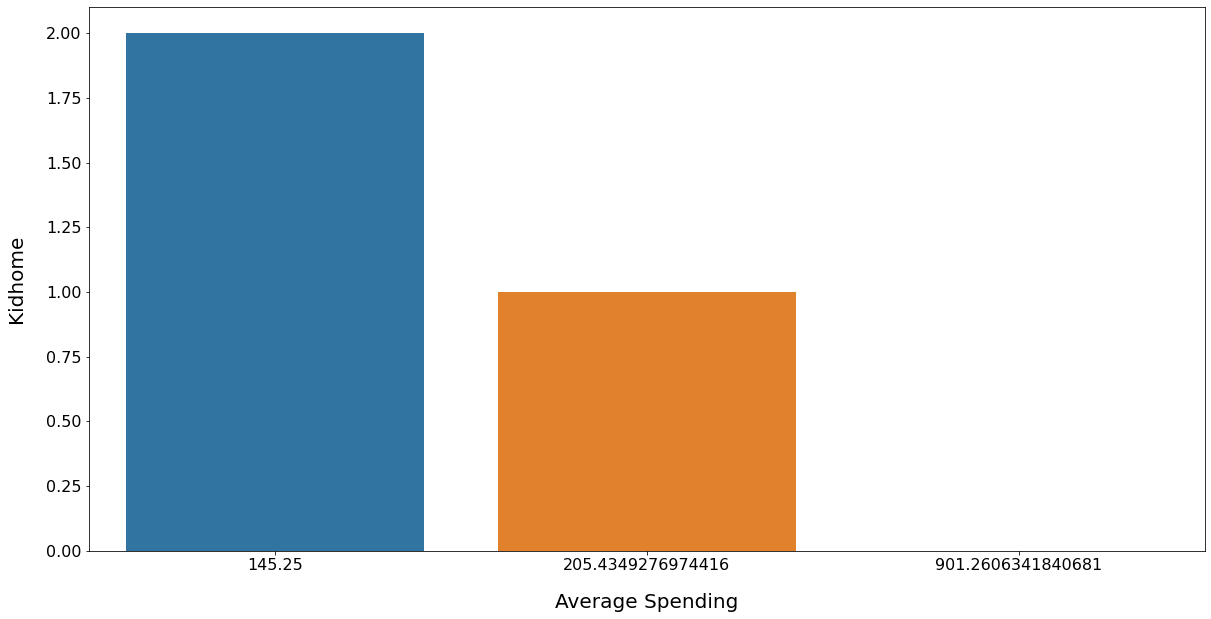

In [36]:
#çocuk sayısına göre harcama
kidhomespending = data.groupby('Kidhome')['TotalSpendings'].mean().sort_values(ascending=False)
kidhomespending_df = pd.DataFrame(list(kidhomespending.items()), columns=['Kidhome', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = kidhomespending_df, x="Average Spending", y="Kidhome");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Kidhome', fontsize=20, labelpad=20);

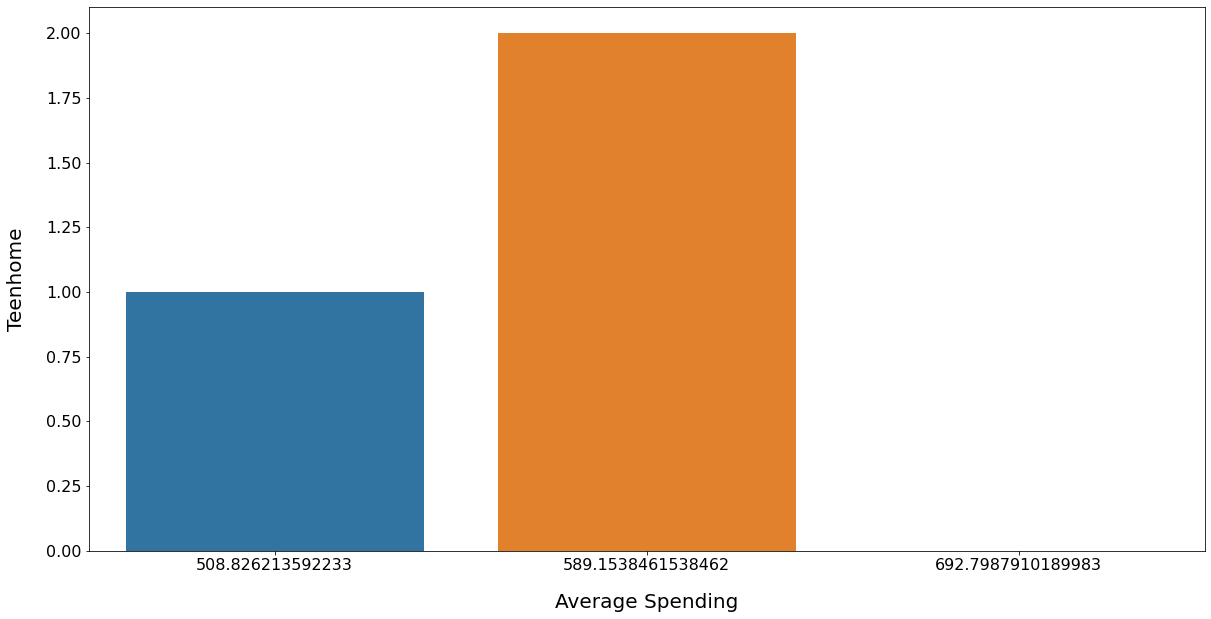

In [37]:
#evdeki genç sayısına göre yapılan harcama
teenhomespending = data.groupby('Teenhome')['TotalSpendings'].mean().sort_values(ascending=False)
teenhomespending_df = pd.DataFrame(list(teenhomespending.items()), columns=['Teenhome', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = teenhomespending_df, x="Average Spending", y="Teenhome");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Teenhome', fontsize=20, labelpad=20);

In [39]:
#Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek
data["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

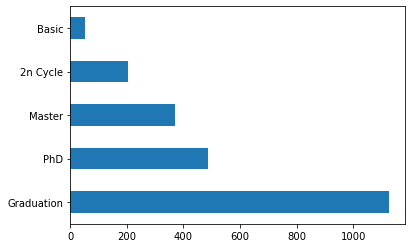

In [40]:
data["Education"].value_counts().plot.barh();

In [42]:
data["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [43]:
data["Teenhome"].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [44]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpendings
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422


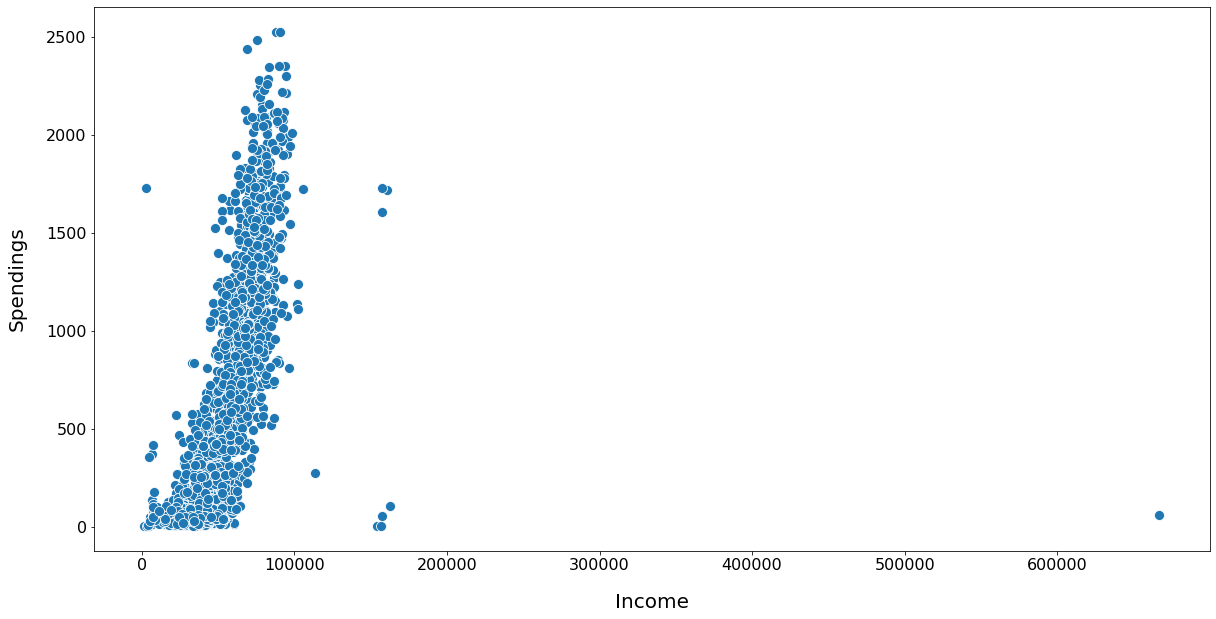

In [45]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=data.Income, y=data.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

In [60]:
X = data.drop(['Year_Birth', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response'], axis=1)

In [61]:
X

,Education,Marital_Status,Income,TotalSpendings
ID,,,,
5524,2,4,58138.0,1617
2174,2,4,46344.0,27
4141,2,5,71613.0,776
6182,2,5,26646.0,53
5324,4,3,58293.0,422
...,...,...,...,...
10870,2,3,61223.0,1341
4001,4,5,64014.0,444
7270,2,2,56981.0,1241


In [62]:
#verideki kategorik değişkenleri nümerik hale getirme işlemi 
from sklearn import preprocessing
lbe=preprocessing.LabelEncoder()
data["Education"] = lbe.fit_transform(data["Education"])
data["Marital_Status"] = lbe.fit_transform(data["Marital_Status"])

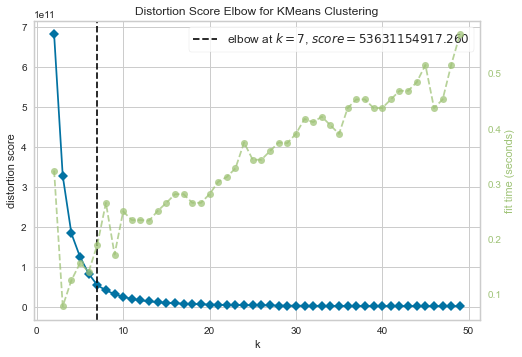

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(X) 
visualizer.poof() 

In [94]:
#2 adet küme oluşturacağız
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state=42).fit(X)
preds = kmeans.predict(X)
customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

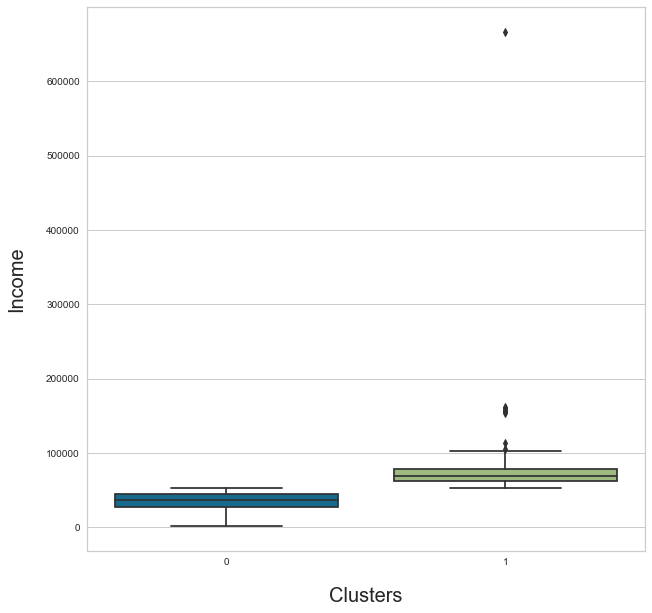

In [95]:
#kümeleme ile tahminlere göz atalım
plt.figure(figsize=(10,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

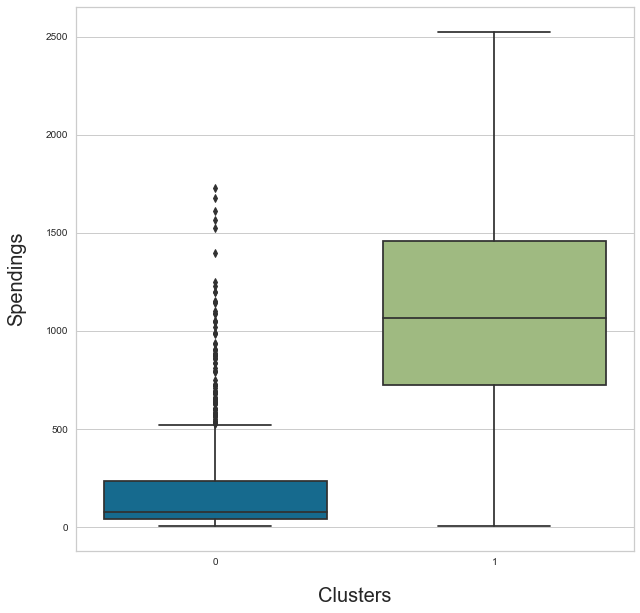

In [96]:
plt.figure(figsize=(10,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

In [97]:
#verimize clusters yani kümelerimizi de ekliyoruz
data['clusters'] = customer_kmeans.clusters

In [98]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpendings,clusters
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,1
2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0
4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,1
6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0
5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,2,3,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1341,1
4001,1946,4,5,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,444,1
7270,1981,2,2,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1241,1


<Figure size 2160x1080 with 0 Axes>

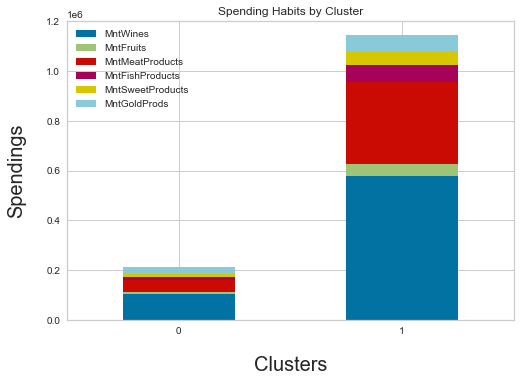

In [104]:
#Kümelere Göre Harcama Alışkanlıkları
cluster_spendings = data.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)#stacked True dersek bize yığın şeklinde veri verir

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

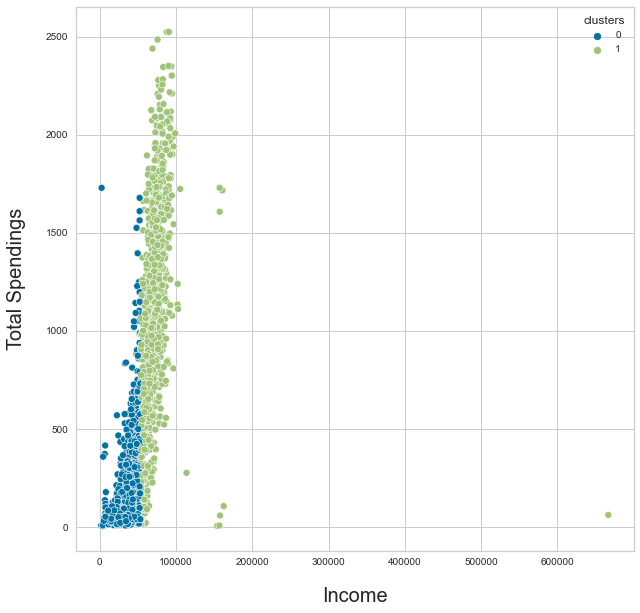

In [101]:
#İlişki: Gelir ve Harcamalar kümeye göre inceleme
plt.figure(figsize=(10,10))
sns.scatterplot(data=data, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

<Figure size 2160x1080 with 0 Axes>

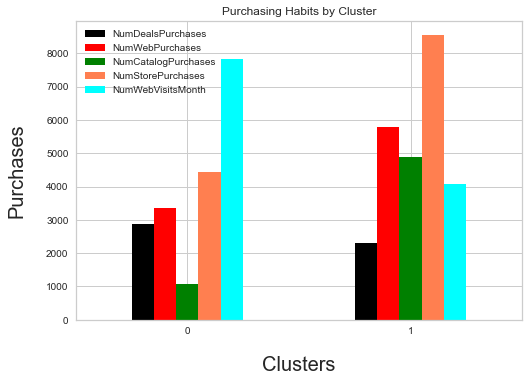

In [102]:
#Kümelere Göre Satın Alma Alışkanlıkları
cluster_purchases = data.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(30,15))
cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

In [105]:
data["clusters"].value_counts()

0    1186
1    1054
Name: clusters, dtype: int64

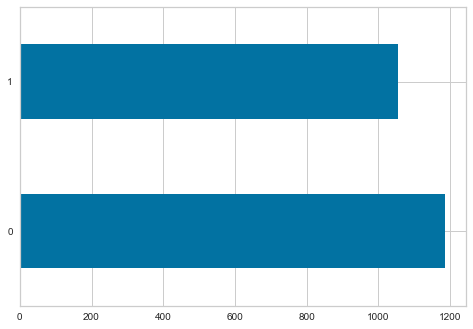

In [106]:
data["clusters"].value_counts().plot.barh();

In [109]:
#kümelere göre toplamda ayda kaç defa site ziyareti yaptığı bilgisi 
data.groupby("clusters")["NumWebVisitsMonth"].sum()

clusters
0    7834
1    4075
Name: NumWebVisitsMonth, dtype: int64

In [110]:
data.groupby("clusters")["TotalSpendings"].sum()

clusters
0     212343
1    1144645
Name: TotalSpendings, dtype: int64